# Тестовое задание СберМегаМаркет

В базе данных информация о клиентах, оформленных на сайте заказах и маркетинговых коммуникациях хранится в нескольких таблицах (описание ниже). Предположим, что в базе содержатся все доступные данные по компании.
Для примера данные таблиц выгружены в excel-файл и приведены на разных листах.


**Описание данных:**

**Таблица Orders – данные о заказах:**

- OrderID – идентификатор заказа, целое типа int.
- CustomerID – идентификатор клиента, целое типа int.
- OrderDate – дата оформления заказа, тип nchar(8), формат записи - "YYYYMMDD".
- OrderState – состояние заказа, строка типа nvarchar(9).
- Возможные значения: "Fulfilled" (исполнен) и "Cancelled" (отменен).
- DeliveryDays – количество дней от оформления заказа до получения его клиентом, целое типа tinyint. 
- Utmkey – идентификатор канала, из которого перешёл клиент, целое типа tinyint.

Первичный ключ таблицы – поле OrderID.

**Таблица Order_List – состав заказов:**

- OrderID – идентификатор заказа, целое типа int.
- SKU – идентификатор товара, целое типа int.
- Quantity – количество заказанного товара, целое типа tinyint.
- Price – стоимость одной единицы товара до применения скидки, целое типа int.
- Discount – относительный размер скидки, с плавающей точкой float

Первичный ключ таблицы – комбинация полей OrderID и SKU.

**Таблица Sent_Emails – отправленные коммуникации:**

- CustomerID – идентификатор клиента, целое типа int.
- Utmkey – идентификатор канала коммуникации, целое типа tinyint.
- Status – статус коммуникации, строка типа nvarchar
- action_id – идентификатор коммуникации
- action_type – канал распространения коммуникации, строка типа nvarchar
- action_name – название коммуникации, строка типа nvarchar
- timestamp – дата статуса коммуникации 

Первичный ключ таблицы – комбинация полей CustomerID, Utmkey, Status, timestamp


## Изучение данных

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
sns.set_palette('coolwarm')

In [ ]:
# читаем данные 

url = "https://docs.google.com/spreadsheets/d/.../edit?usp=sharing&ouid=103209603656676002339&rtpof=true&sd=true"
orders = pd.read_excel('https://drive.google.com/uc?id=' + url.split('/')[-2], sheet_name='Orders')
order_list = pd.read_excel('https://drive.google.com/uc?id=' + url.split('/')[-2], sheet_name='Order_List')
sent_emails = pd.read_excel('https://drive.google.com/uc?id=' + url.split('/')[-2], sheet_name='Sent_Emails')

In [ ]:
# изучим датасет

def info(df):
  print('Общая информация о наборе данных\n')
  print('Размер таблицы: {}\n'.format(df.shape), '\n')
  print('Количество пропусков: \n', df.isnull().sum(), '\n')
  print('Тип данных: \n', df.dtypes, '\n')
  display(df.sample(7, random_state=1))


In [ ]:
for df in orders, order_list, sent_emails:
  info(df)

Общая информация о наборе данных

Размер таблицы: (10000, 6)
 

Количество пропусков: 
 OrderID           0
CustomerID        0
OrderDate         0
OrderState        0
DeliveryDays    556
Utmkey            0
dtype: int64 

Тип данных: 
 OrderID           int64
CustomerID        int64
OrderDate         int64
OrderState       object
DeliveryDays    float64
Utmkey            int64
dtype: object 



,OrderID,CustomerID,OrderDate,OrderState,DeliveryDays,Utmkey
9953,263935,4744,20180331,Fulfilled,5.0,323085
3850,610491,5932,20180204,Fulfilled,1.0,323118
4962,356456,2871,20180214,Fulfilled,3.0,323242
3886,483821,3690,20180204,Fulfilled,4.0,323118
5437,651035,2466,20180218,Fulfilled,4.0,323085
8517,116933,3636,20180319,Fulfilled,5.0,323100
2041,807138,5754,20180119,Fulfilled,6.0,323188


Общая информация о наборе данных

Размер таблицы: (19109, 5)
 

Количество пропусков: 
 OrderID     0
SKU         0
Quantity    0
Price       0
Discount    0
dtype: int64 

Тип данных: 
 OrderID       int64
SKU           int64
Quantity      int64
Price         int64
Discount    float64
dtype: object 



,OrderID,SKU,Quantity,Price,Discount
15884,829446,1101868672,2,627,0.370342
1225,65275,1101468187,3,8683,0.406171
2278,124727,1101904476,2,4182,0.106708
9532,507316,1101192412,1,6156,0.178900
12861,678003,1101700173,1,2399,0.380932
13971,732403,1101084783,2,347,0.424543
17457,910460,1101465056,2,6758,0.014145


Общая информация о наборе данных

Размер таблицы: (924, 7)
 

Количество пропусков: 
 CustomerID     0
Utmkey         0
status         0
action_id      0
action_type    0
action_name    0
timestamp      0
dtype: int64 

Тип данных: 
 CustomerID      int64
Utmkey          int64
status         object
action_id       int64
action_type    object
action_name    object
timestamp       int64
dtype: object 



,CustomerID,Utmkey,status,action_id,action_type,action_name,timestamp
819,4672,323445,delivered,394,email,⚡️ Уже оценили «Машину кэшбэка»?,20180209
701,177,323424,delivered,281,email,🚀 Запустите Машину Кэшбэка,20180209
479,4652,323424,delivered,281,email,🚀 Запустите Машину Кэшбэка,20180209
385,2153,323424,delivered,281,email,🚀 Запустите Машину Кэшбэка,20180209
154,3284,323424,delivered,281,email,🚀 Запустите Машину Кэшбэка,20180209
125,405,323409,opened,392,email,"🎰 Не машина, а пушка!",20180209
897,5267,323445,delivered,394,email,⚡️ Уже оценили «Машину кэшбэка»?,20180209


## Предобработка данных


* преобразование типов данных: в датафреймах необходимо перевести формат дат из строк в datetime

In [ ]:
orders['OrderDate_dt'] = pd.to_datetime(orders['OrderDate'], format="%Y%m%d")
sent_emails['timestamp_dt'] = pd.to_datetime(sent_emails['timestamp'], format="%Y%m%d")

# проверим:
print('Формат даты заказа, OrderDate_dt:', orders['OrderDate_dt'].dtypes)
print('Формат даты коммуникации, timestamp_dt:', sent_emails['timestamp_dt'].dtypes)

Формат даты заказа, OrderDate_dt: datetime64[ns]
Формат даты коммуникации, timestamp_dt: datetime64[ns]


* проверим данные на наличие дубликатов

исходя из данных о первичных ключах таблиц

In [ ]:
print('Количество дубликатов в таблице заказов orders:',
      len(orders[orders.duplicated(subset=['OrderID'])]))
print('Количество дубликатов в таблице состава заказов order_list:',
      len(order_list[order_list.duplicated(subset=['OrderID', 'SKU'])]))
print('Количество дубликатов в таблице коммуникаций sent_emails:',
      len(sent_emails[sent_emails.duplicated(subset=['CustomerID', 'Utmkey', 'status', 'timestamp'])]))

Количество дубликатов в таблице заказов orders: 0
Количество дубликатов в таблице состава заказов order_list: 0
Количество дубликатов в таблице коммуникаций sent_emails: 0


* пропуски в DeliveryDays (количество дней от оформления заказа до получения его клиентом)

In [ ]:
# посмотрим на статус заказа в строках и пропущенными значениями

orders.loc[(orders.DeliveryDays.isna())]['OrderState'].unique()

array(['Cancelled'], dtype=object)

Пропуски в данных присутствуют только для отмененных заказов. Они логичны и заполнения не требуют

По всем завершенным заказам информация есть, по всем отмененным - отсутствует

**Большей предобработки данные не требуют, переходим к анализу**

## 1. Расчет ретеншн рейт когорт в следующий месяц и во второй месяц после совершения первого заказа

Например, в случае январской когорты считаем выживаемость в феврале (первый месяц) и в марте (второй месяц). 
Когорта определяется по месяцу совершения первого исполненного (Fulfilled) заказа. 

Для решения задачи:

1. сформируем когорты
- определить дату (месяц) первой покупки
- определить lifetime
- определить количество клиентов вкаждой когорте

2. рассчитать коэффициент удержания

In [ ]:
# выделим из датасета совершенные заказы - сохраним в fulfilled_orders
fulfilled_orders = orders.query('OrderState == "Fulfilled"')

# определим дату первой покупки (first_order_date) и дополним сведениями таблицу fulfilled_orders

first_order_date_by_customers = fulfilled_orders.groupby(['CustomerID'])['OrderDate_dt'].min()
first_order_date_by_customers.name = 'first_order_date'
fulfilled_orders = fulfilled_orders.join(first_order_date_by_customers, on='CustomerID')
fulfilled_orders.head()

,OrderID,CustomerID,OrderDate,OrderState,DeliveryDays,Utmkey,OrderDate_dt,first_order_date
0,944851,453,20180101,Fulfilled,0.0,323118,2018-01-01,2018-01-01
1,248028,5138,20180101,Fulfilled,7.0,323188,2018-01-01,2018-01-01
2,980276,4850,20180101,Fulfilled,6.0,323242,2018-01-01,2018-01-01
3,672231,1136,20180101,Fulfilled,1.0,323118,2018-01-01,2018-01-01
4,521764,1720,20180101,Fulfilled,1.0,323179,2018-01-01,2018-01-01


In [ ]:
# выделим из дат месяц для опредления метрик 
# для удобства восприятия оставим только месяц и год 

fulfilled_orders['order_month'] = fulfilled_orders['OrderDate_dt'].astype('datetime64[M]').dt.strftime('%Y-%m')
fulfilled_orders['first_order_month'] = fulfilled_orders['first_order_date'].astype('datetime64[M]').dt.strftime('%Y-%m')

In [ ]:
# Найдём время жизни lifetime для когорт

fulfilled_orders['cohort_lifetime'] = ((fulfilled_orders['OrderDate_dt'] - fulfilled_orders['first_order_date']) / 
                             np.timedelta64(1, 'M')).round().astype('int')

# сгруппируем данные по когорте и lifetime. 
# Посчитаем для каждой когорты количество активных пользователей по месяцам

cohorts = fulfilled_orders.groupby(['first_order_month','cohort_lifetime']
                                   ).agg(
                                       {'CustomerID': ['count', 'nunique']}
                                       ).reset_index()

In [ ]:
cohorts.set_axis(
    ['first_order_month', 'cohort_lifetime','customer_count', 'unique_customer'], 
    axis = 'columns', inplace=True)

In [ ]:
# исходное количество пользователей в когорте
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_order_month', 'unique_customer']]
# переименуем столбец
initial_users_count = initial_users_count.rename(columns={'unique_customer':'cohort_users'})
# объединим таблицы
cohorts = cohorts.merge(initial_users_count, on='first_order_month')
# вычислим коэффициент удержания
cohorts['retention'] = cohorts['unique_customer']/cohorts['cohort_users']

In [ ]:
cohorts

,first_order_month,cohort_lifetime,customer_count,unique_customer,cohort_users,retention
0,2018-01,0,3215,2407,2407,1.000000
1,2018-01,1,1529,1131,2407,0.469880
2,2018-01,2,1318,1003,2407,0.416701
3,2018-01,3,171,160,2407,0.066473
4,2018-02,0,1500,1134,1134,1.000000
5,2018-02,1,642,487,1134,0.429453
6,2018-02,2,99,92,1134,0.081129
7,2018-03,0,903,726,726,1.000000
8,2018-03,1,67,64,726,0.088154


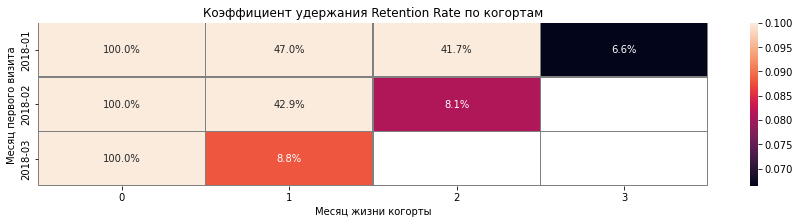

In [ ]:
# визуализируем

retention_pivot = cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum')


plt.figure(figsize=(15, 3))
plt.title('Коэффициент удержания Retention Rate по когортам')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', vmax=0.1, 
            linewidths=0.4, linecolor='grey') 
plt.xlabel('Месяц жизни когорты')
plt.ylabel('Месяц первого визита')
plt.show()

**Результаты**



In [ ]:
# сформируем таблицу результатаов в заданном формате

result = cohorts.groupby('first_order_month')['cohort_users'].max().reset_index()
result = result.merge(cohorts.query('cohort_lifetime == 1')[['first_order_month', 'retention']], 
                      how='left',
                      on='first_order_month')
result = result.merge(cohorts.query('cohort_lifetime == 2')[['first_order_month', 'retention']],
                      how='left',
                      on='first_order_month')

# переименуем столбцы
result.set_axis(
    ['Когорта', 'Размер когорты','Retention rate в первый месяц', 'Retention rate во второй месяц'], 
    axis = 'columns', inplace=True)

result['Retention rate в первый месяц'] = round(result['Retention rate в первый месяц']*100, 2).astype(str) + ' %'
result['Retention rate во второй месяц'] = round(result['Retention rate во второй месяц']*100, 2).astype(str) + ' %'

### Вывод - 1

In [ ]:
result

,Когорта,Размер когорты,Retention rate в первый месяц,Retention rate во второй месяц
0,2018-01,2407,46.99 %,41.67 %
1,2018-02,1134,42.95 %,8.11 %
2,2018-03,726,8.82 %,nan %


## 2. Расчет средних затрат на удержание и привлечение в рублях по месяцам. 

Затраты на удержание считаем, как средний размер скидки (Discount) по заказам повторных клиентов, затраты на привлечение – средний размер скидки в заказах новых клиентов. 

Для решения задачи:

1. посчитаем суммарную скидку по всему заказу 
- расчет скидки с учетом количества ед.товара
- группировка по id заказа и суммирование скидок

2. по дате заказа определим статус заказа - первичный или повторный

3. вычислим затраты на привлечение и на удержание

In [ ]:
# суммарная скидка по каждой позоции 
order_list['sum_discount_per_position'] = order_list['Price'] * order_list['Quantity'] * order_list['Discount'] 
# суммарная скидка по заказу 
order_discount = order_list.groupby('OrderID')['sum_discount_per_position'].sum()
order_discount.name = 'sum_discount_per_order'

# добавим информацию о скидках в таблицу заказов
fulfilled_orders = fulfilled_orders.merge(order_discount, how='left', on='OrderID')

In [ ]:
# функция для определения статуса повторности заказа

'''

Сделаем допущение: будем считать, что все заказы, 
совершенные в день привлечения (дата первой покупки), являются первичными.

Допущение необходимо, поскольку в исходных данных отсутствует информация о времени совершения покупки. 
Самостоятельный выбор в определении очередности совершения заказов может привести к большему искажению результатов,
нежели чем принятие допущения выше.

'''

def status_func(row):
    if row['OrderDate_dt'] == row['first_order_date']:
        return 'first'
    return 'repeated'

# добавляем информацию о статусе в датафрейм
fulfilled_orders['order_status'] = fulfilled_orders.apply(status_func, axis=1)
fulfilled_orders.head(3)

,OrderID,CustomerID,OrderDate,OrderState,DeliveryDays,Utmkey,OrderDate_dt,first_order_date,order_month,first_order_month,cohort_lifetime,sum_discount_per_order,order_status
0,944851,453,20180101,Fulfilled,0.0,323118,2018-01-01,2018-01-01,2018-01,2018-01,0,4479.078509,first
1,248028,5138,20180101,Fulfilled,7.0,323188,2018-01-01,2018-01-01,2018-01,2018-01,0,4409.232765,first
2,980276,4850,20180101,Fulfilled,6.0,323242,2018-01-01,2018-01-01,2018-01,2018-01,0,2348.271859,first


In [ ]:
# вычисление целевых показателей

result2 = fulfilled_orders.pivot_table(
    index='order_month',
    columns='order_status',
    values='sum_discount_per_order',
    aggfunc={
        lambda x: str(int(x.sum())) + " ₽",
    }
)
result2 = result2.reset_index()
result2.set_axis(
    ['Месяц','Затраты на привлечение', 'Затраты на удержание'], 
    axis = 'columns', inplace=True)



### Вывод - 2

In [ ]:
result2

,Месяц,Затраты на привлечение,Затраты на удержание
0,2018-01,11120223 ₽,4135328 ₽
1,2018-02,5516015 ₽,8635919 ₽
2,2018-03,3453521 ₽,12011965 ₽


## 3. Расчет показатели эффективности email рассылок

Необходимо вывести размеры сегментов, click rate, open rate, количество заказов, которые сделали, перейдя по этой рассылке, суммарную стоимость заказов, средний чек. 

Декомпозиция задачи:

1. выделить информацию по письмам, которые были доставлены до клиента
2. рассчитать метрики открываемости и кликательности
3. выделить информацию о заказах, которые были совершены после перехода из е-мейл рассылки (по CustomerID и Utmkey)
4. рассчитать количество совершенных заказов, суммарчный и средний чек в разрезе источников перехода

In [ ]:
# изучим (и проверим) данные в таблице

display(sent_emails.sample(5, random_state=1))

,CustomerID,Utmkey,status,action_id,action_type,action_name,timestamp,timestamp_dt
819,4672,323445,delivered,394,email,⚡️ Уже оценили «Машину кэшбэка»?,20180209,2018-02-09
701,177,323424,delivered,281,email,🚀 Запустите Машину Кэшбэка,20180209,2018-02-09
479,4652,323424,delivered,281,email,🚀 Запустите Машину Кэшбэка,20180209,2018-02-09
385,2153,323424,delivered,281,email,🚀 Запустите Машину Кэшбэка,20180209,2018-02-09
154,3284,323424,delivered,281,email,🚀 Запустите Машину Кэшбэка,20180209,2018-02-09


In [ ]:
for col in ['status', 'action_name', 'action_type']:
  print(col, '\n')
  print(sent_emails[col].unique(), '\n')
  print(sent_emails[col].describe(), '\n')

status 

['delivered' 'opened' 'suppressed' 'clicked' 'hard_bounced' 'soft_bounced'] 

count           924
unique            6
top       delivered
freq            778
Name: status, dtype: object 

action_name 

['🎰 Не машина, а пушка!' '🚀 Запустите Машину Кэшбэка'
 '⚡️ Уже оценили «Машину кэшбэка»?'] 

count                            924
unique                             3
top       🚀 Запустите Машину Кэшбэка
freq                             659
Name: action_name, dtype: object 

action_type 

['email'] 

count       924
unique        1
top       email
freq        924
Name: action_type, dtype: object 



- в статусе коммуникации есть информация о недоставленных письмах. Эти строки необходимо будет отфильтровать при  вычислении метрик
- пропусков/лишних данных (иных кампаний коммуникаций) в датафрейме нет

### open и click rate

In [ ]:
# е-мейлы, полученные адресатами

sent_emails_filt = sent_emails.query(
    'status != "hard_bounced" and status != "soft_bounced" and status != "suppressed"'
)

# доставляемость
delivered = sent_emails_filt.groupby(['action_name', 'Utmkey'])['CustomerID'].count()
delivered.name = 'delivered'
delivered = delivered.reset_index()

# кликабельность
click = sent_emails.query('status == "clicked"').groupby('action_name')['CustomerID'].count()
click.name = 'click'

# открываемость
open = sent_emails.query('status == "opened"').groupby('action_name')['CustomerID'].count()
open.name = 'open'

In [ ]:
# добавим информацию в таблицу 
result3 = delivered.merge(click, how='left', on='action_name')
result3 = result3.merge(open, how='left', on='action_name')

#вычисляем метрики
result3['click rate'] = round(result3['click'] / result3['delivered'] * 100, 2).astype(str) + ' %'
result3['open rate'] = round(result3['open'] / result3['delivered'] * 100, 2).astype(str) + ' %'

result3

,action_name,Utmkey,delivered,click,open,click rate,open rate
0,⚡️ Уже оценили «Машину кэшбэка»?,323445,122,2,21,1.64 %,17.21 %
1,"🎰 Не машина, а пушка!",323409,138,2,16,1.45 %,11.59 %
2,🚀 Запустите Машину Кэшбэка,323424,641,13,69,2.03 %,10.76 %


### количество заказов, стоимость и средний чек 

In [ ]:
# ID клиентов, перешедших по ссылке 
customerID_clicked = sent_emails.query('status == "clicked"').CustomerID.unique()

# идентификаторы каналов
utmkey = sent_emails.Utmkey.unique()

In [ ]:
# выделим заказы, совершенные после перехода из рассылки
orders_by_email = fulfilled_orders.query('(CustomerID in @customerID_clicked) and (Utmkey in @utmkey)')

In [ ]:
# стоимость позиции в чеке с учетом количества ед товара и скидки
order_list['cost'] = order_list['Quantity'] * order_list['Price'] * (1 - order_list['Discount'])
# итог по чеку
revenue = order_list.groupby('OrderID')['cost'].sum()
revenue.name = 'revenue'

In [ ]:
# добавим информацию по сумме заказа и среднему чеку
orders_by_email = orders_by_email.merge(revenue, how='left', on='OrderID')
orders_by_email_utmkey = orders_by_email.groupby('Utmkey').agg(
        count = ('OrderID', lambda x: x.count()),
        sum_revenue = ('revenue', lambda x: str(round(x.sum(), 1))+ " ₽"),
        mean_revenue = ('revenue', lambda x: str(round(x.mean(), 1))+ " ₽"),
)
orders_by_email_utmkey = orders_by_email_utmkey.reset_index()
orders_by_email_utmkey.set_axis(['Utmkey', 'Заказы', 'Стоимость', 'Средний чек'],
                                axis = 'columns', inplace=True)

In [ ]:
orders_by_email_utmkey

,Utmkey,Заказы,Стоимость,Средний чек
0,323409,4,86831.8 ₽,21708.0 ₽
1,323424,8,103133.5 ₽,12891.7 ₽


In [ ]:
# добавим в сводную таблицу ответов
result3 = result3.merge(orders_by_email_utmkey, how='left', on='Utmkey')

# удалим ненужные в ответе столбцы
result3 = result3.drop(['Utmkey','click', 'open'], axis='columns')
# заменим пропуски на прочерк
result3.fillna("-", inplace = True)
# переименуем столбцы
result3 = result3.rename(columns={'action_name':'Акция', 'delivered':'Сегмент'})

### Вывод - 3

In [ ]:
result3

,Акция,Сегмент,click rate,open rate,Заказы,Стоимость,Средний чек
0,⚡️ Уже оценили «Машину кэшбэка»?,122,1.64 %,17.21 %,-,-,-
1,"🎰 Не машина, а пушка!",138,1.45 %,11.59 %,4.0,86831.8 ₽,21708.0 ₽
2,🚀 Запустите Машину Кэшбэка,641,2.03 %,10.76 %,8.0,103133.5 ₽,12891.7 ₽
